In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive Analysis

In [4]:
df = pd.read_csv("sales_data_with_discounts.csv")
df

#we import our dataset and store it in a variable


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


Descriptive Analysis

In [5]:
df.info()
#gather some info to find out whether our dataset has null values or not
#also dtype of every column/feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [6]:
df.describe()
# here we noticed that out numerical columns have outliers 


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
#This function will help get the mean, mode and median of numerical columns in our dataset

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for i in numeric_cols:
    mean_value = df[i].mean()
    mode_value = df[i].mode()
    median_value = df[i].median()

    print(f"Column: {i}")
    print(f"Mean: {mean_value}")
    print(f"Mode: {mode_value}")
    print(f"Median: {median_value}")
    print("-"*20)

Column: Volume
Mean: 5.066666666666666
Mode: 0    3
Name: Volume, dtype: int64
Median: 4.0
--------------------
Column: Avg Price
Mean: 10453.433333333332
Mode: 0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64
Median: 1450.0
--------------------
Column: Total Sales Value
Mean: 33812.83555555555
Mode: 0    24300
Name: Total Sales Value, dtype: int64
Median: 5700.0
--------------------
Column: Discount Rate (%)
Mean: 15.155241895330914
Mode: 0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64
Median: 16.57776564929597
--------------------
Column: Discount Amount
Mean: 3346.499424342415
Mode: 0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448 

# Data visualization

### plotting histogram for all numerical columns to learn about their skewness and kurtosis

#### Creating a function so that we dont have manually plot for each column

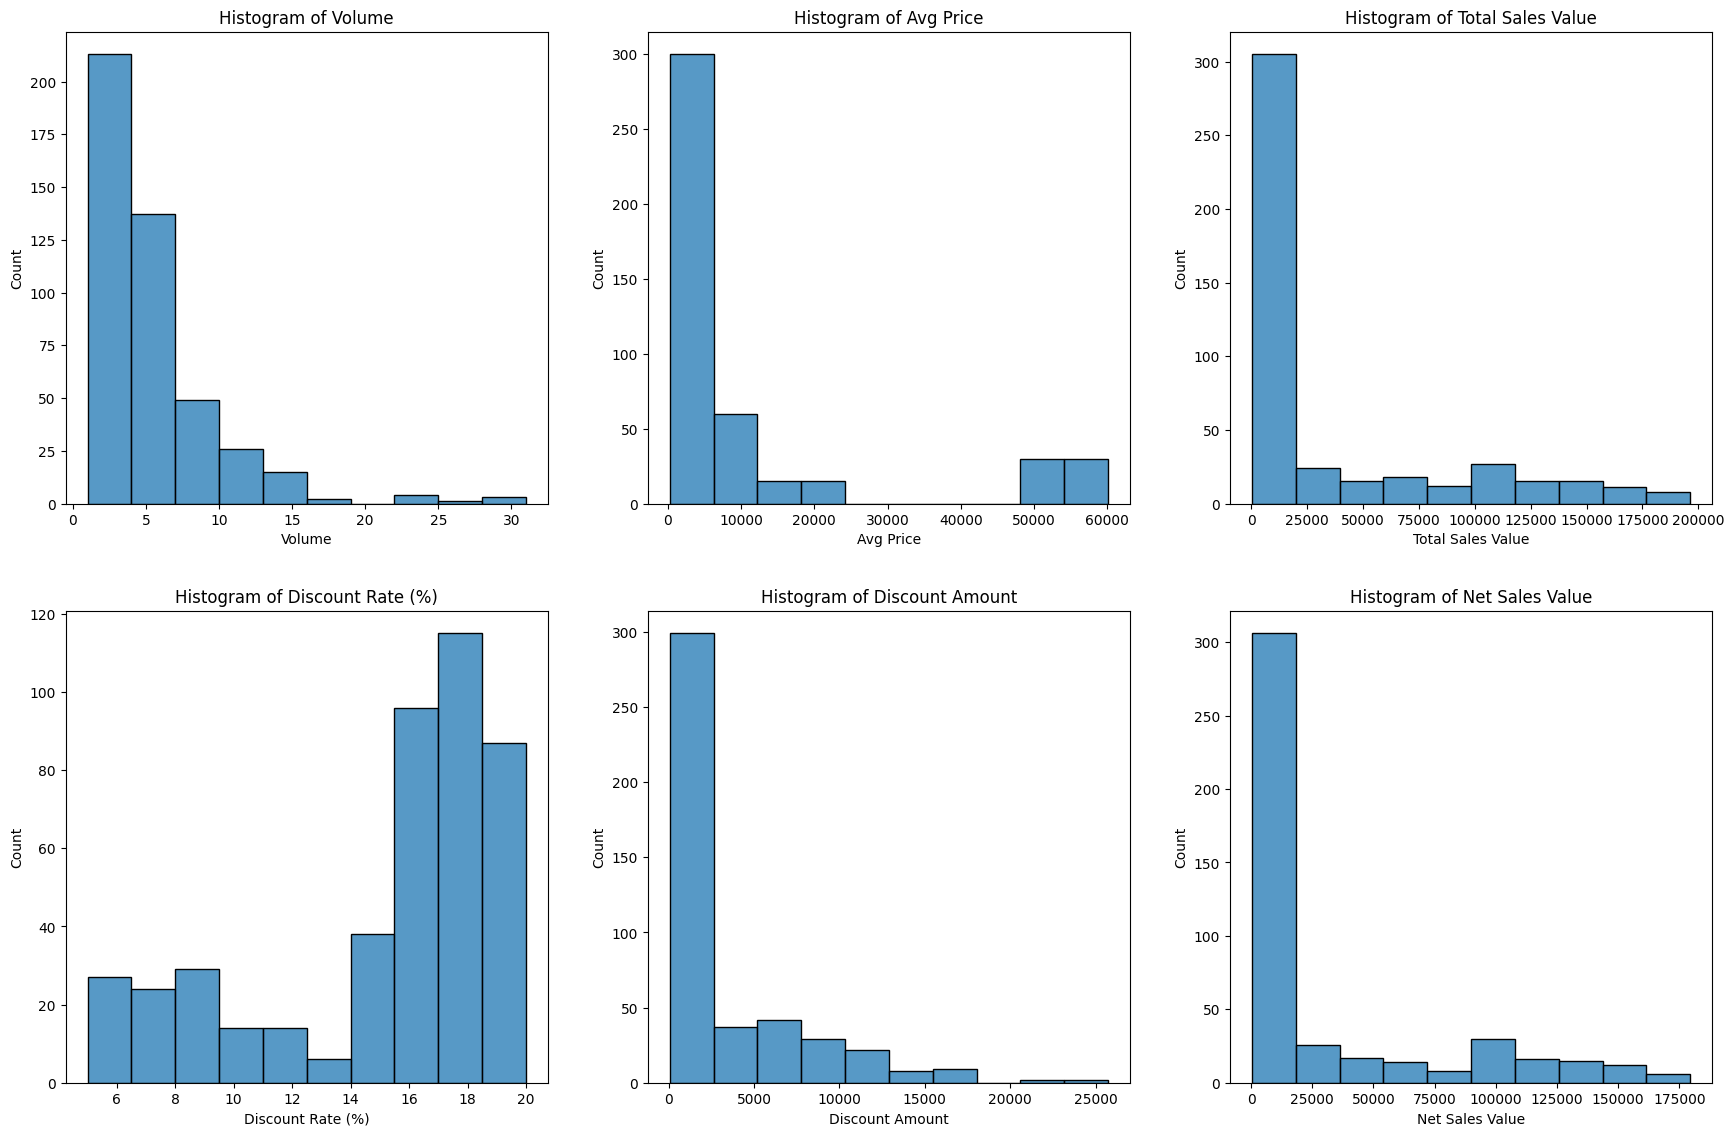

In [8]:
def plot_histograms(df, bins=10):
    """
    Plots histograms for all numeric columns in the provided DataFrame in a single grid layout,
    with enough spacing between the plots to avoid cluttering.
    
    Parameters:
    df (pandas.DataFrame): The dataset to plot histograms for.
    bins (int): Number of bins to use for the histograms.
    """
    # Filter numeric columns only
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    if numeric_cols.empty:
        print("No numeric columns found in the dataset.")
        return
    
    # Set the number of columns for subplots
    num_cols = len(numeric_cols)
    cols = 3  # Number of plots per row
    rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate required rows
    
    # Set the figure size dynamically based on the number of plots
    plt.figure(figsize=(cols * 6, rows * 6))  # Adjust this for better spacing
    
    # Loop through all numeric columns and create a histogram for each
    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)  # Adjust the subplot grid
        sns.histplot(df[column], bins=bins, kde=False)
        plt.title(f'Histogram of {column}')
    
    # Adjust layout to prevent overlapping of subplots and make them well spaced
    plt.tight_layout(pad=3.0)  # 'pad' controls spacing between plots
    
    # Show the plot
    plt.show()

plot_histograms(df)


##### from most of the histogram figures we can conlude that our data is mostly right skewed

#### plotting box plot to find out about outliers using function 

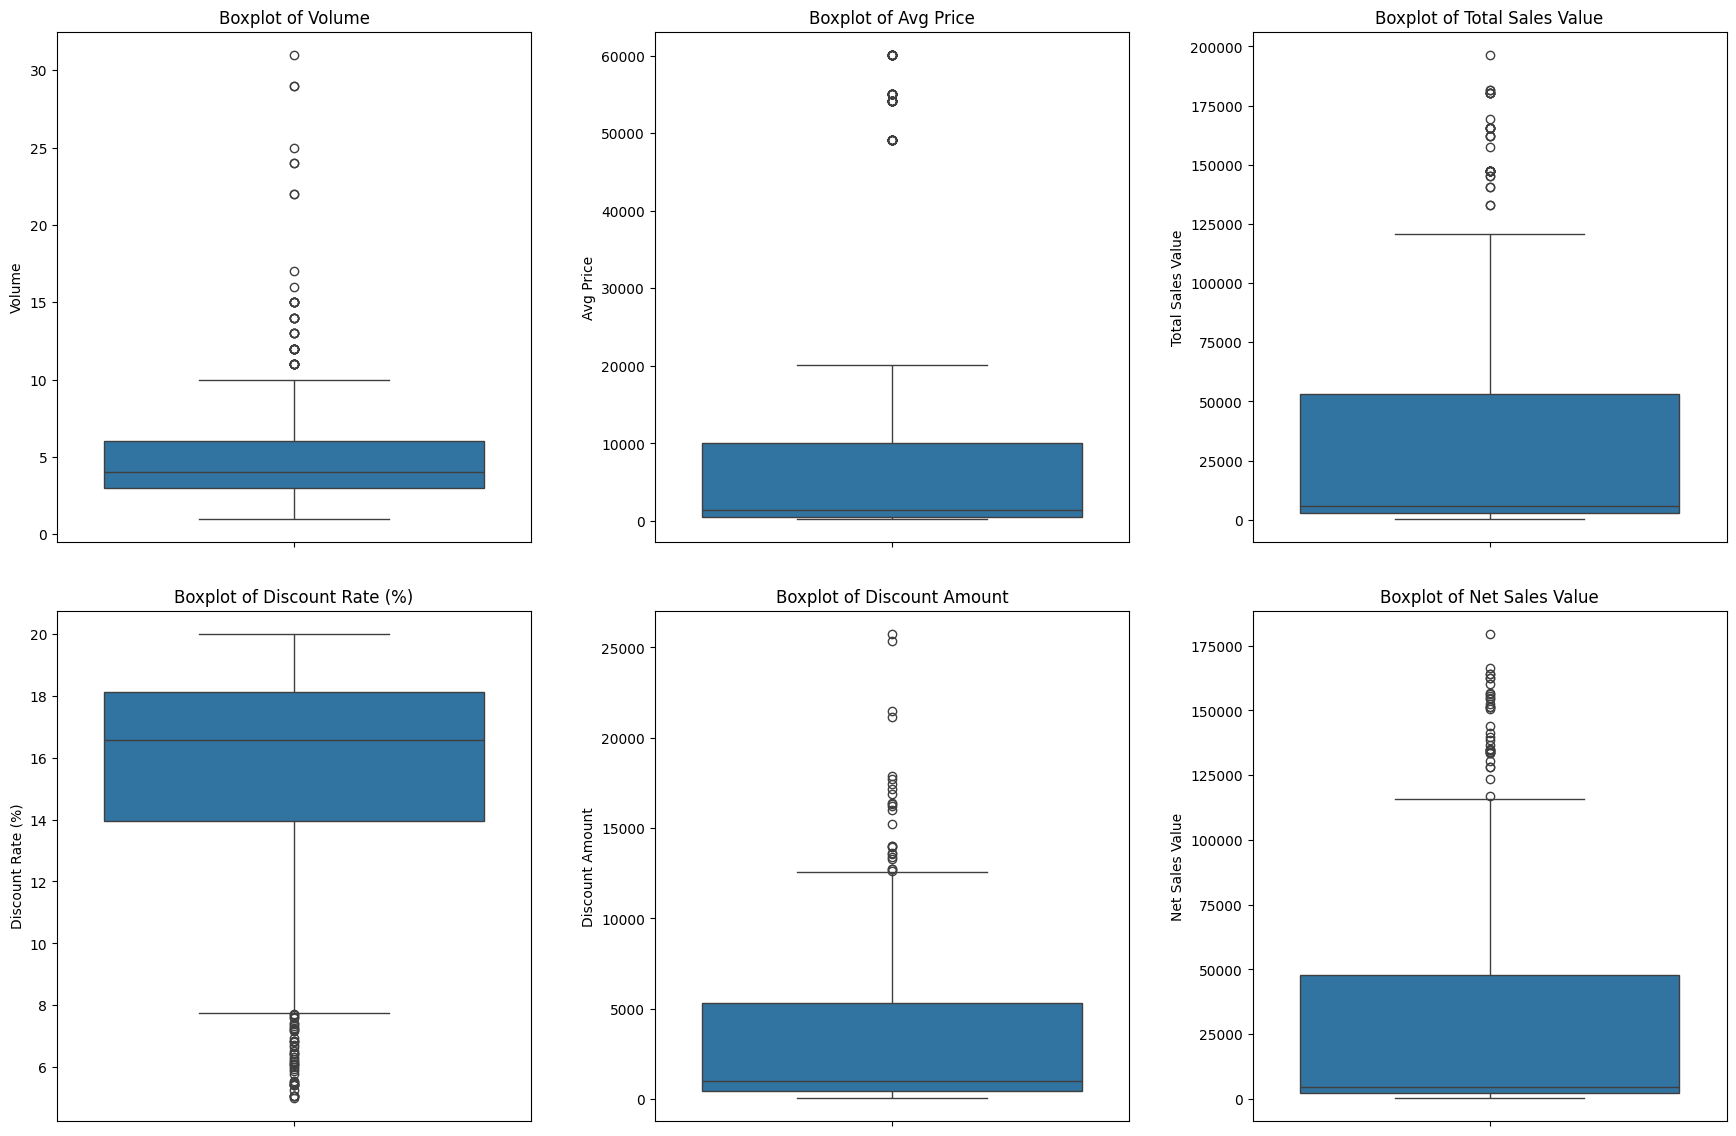

In [9]:
import seaborn as sns
def plot_boxplots(df):
    """
    Plots boxplots for all columns in the provided DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The dataset to plot boxplots for.

    """
   # Filter numeric columns only
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    if numeric_cols.empty:
        print("No numeric columns found in the dataset.")
        return
    
    # Set the number of columns for subplots
    num_cols = len(numeric_cols)
    cols = 3  # Number of plots per row
    rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate required rows
    
    # Set the figure size dynamically based on the number of plots, increasing spacing
    plt.figure(figsize=(cols * 6, rows * 6))  # Adjust this for better spacing
    
    # Loop through all numeric columns and create a boxplot for each
    for i, column in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)  # Adjust the subplot grid
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column}')
    
    # Adjust layout to prevent overlapping of subplots and make them well spaced
    plt.tight_layout(pad=3.0)  # 'pad' controls spacing between plots
    
    # Show the plot
    plt.show()

plot_boxplots(df)

#### Every column in our dataset has outliers in it

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


#### Plotting Charts for Categorical Columns

<BarContainer object of 450 artists>

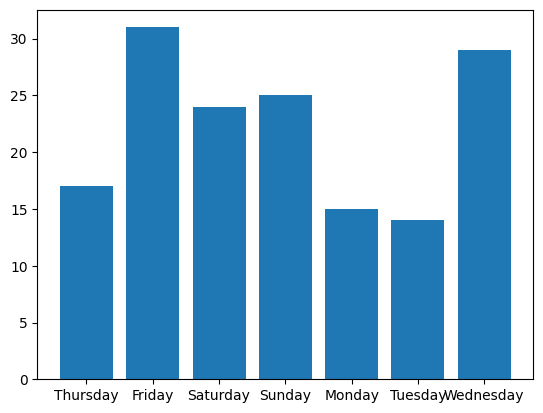

In [11]:
plt.bar(df["Day"], df["Volume"])

from above we can say that most volume appears to be on friday

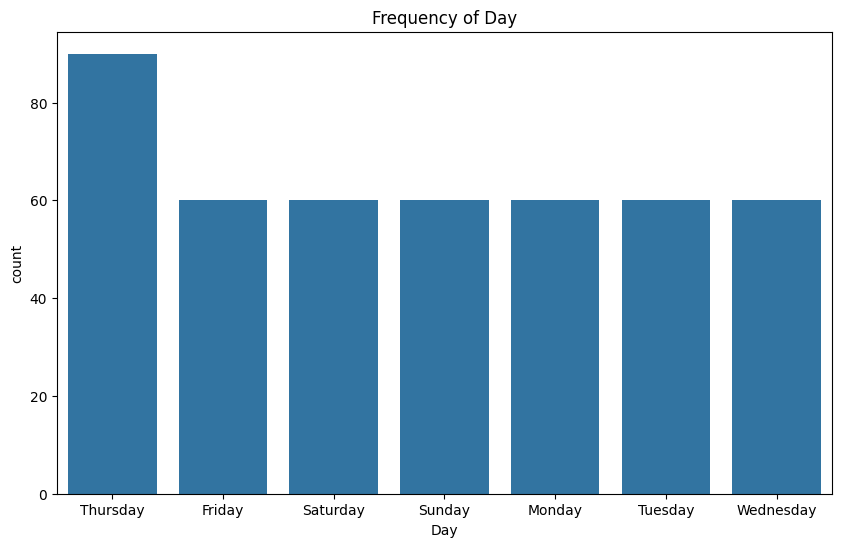

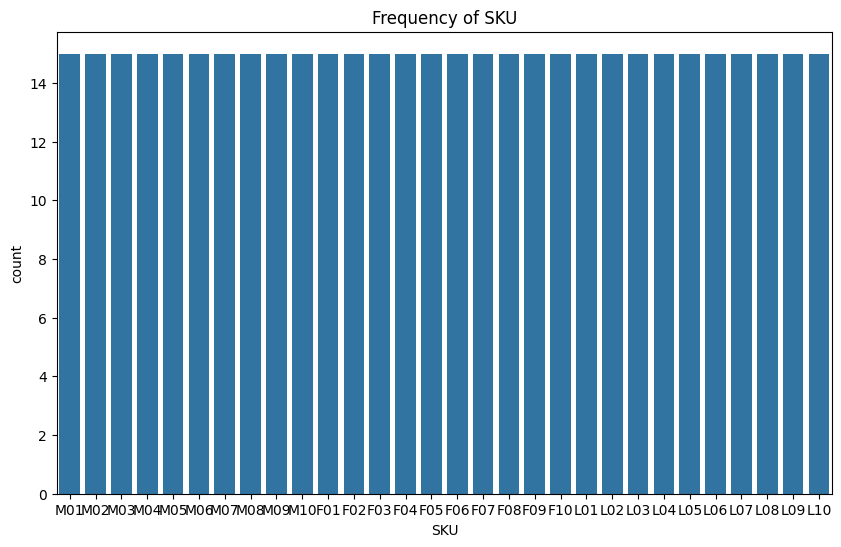

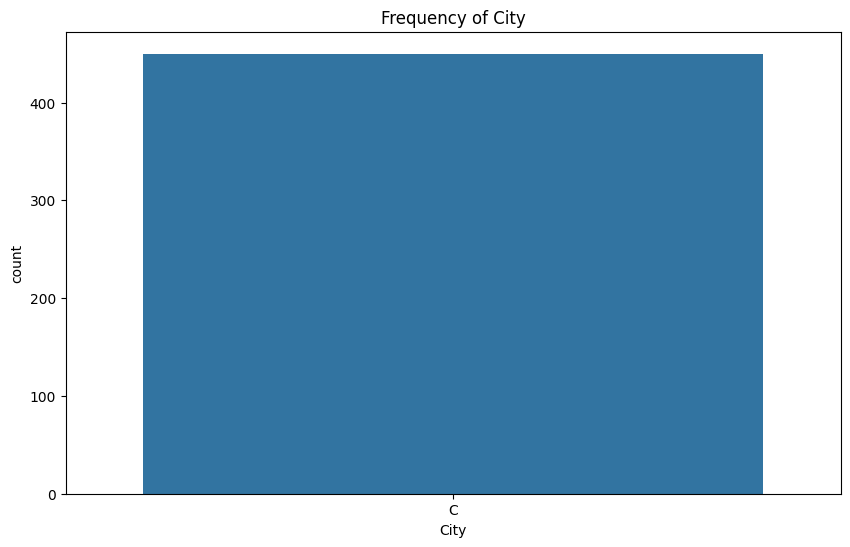

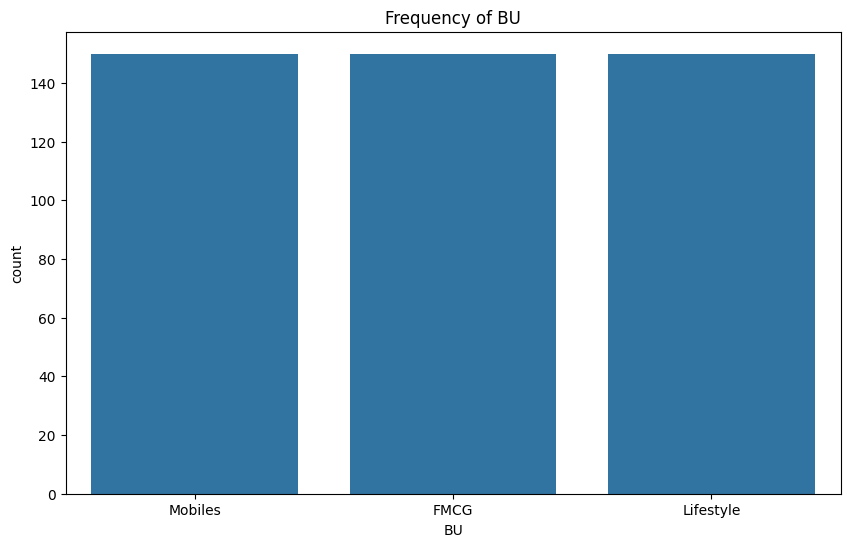

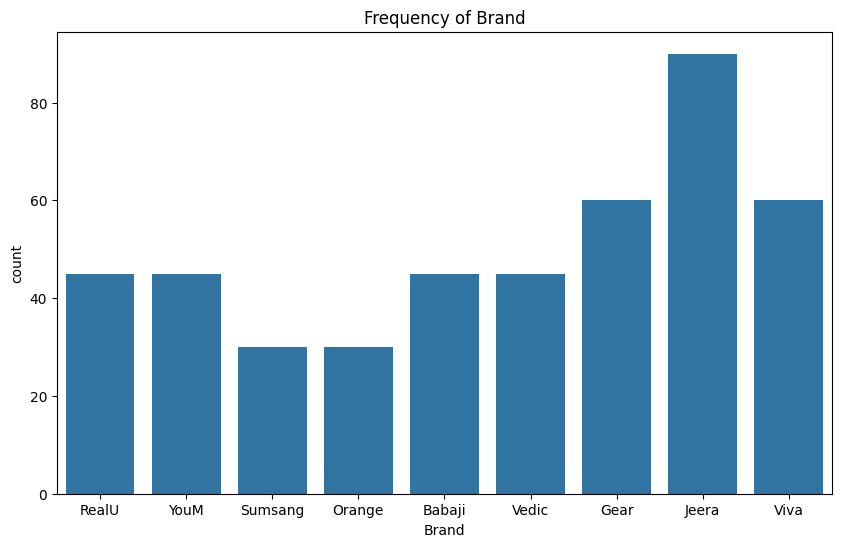

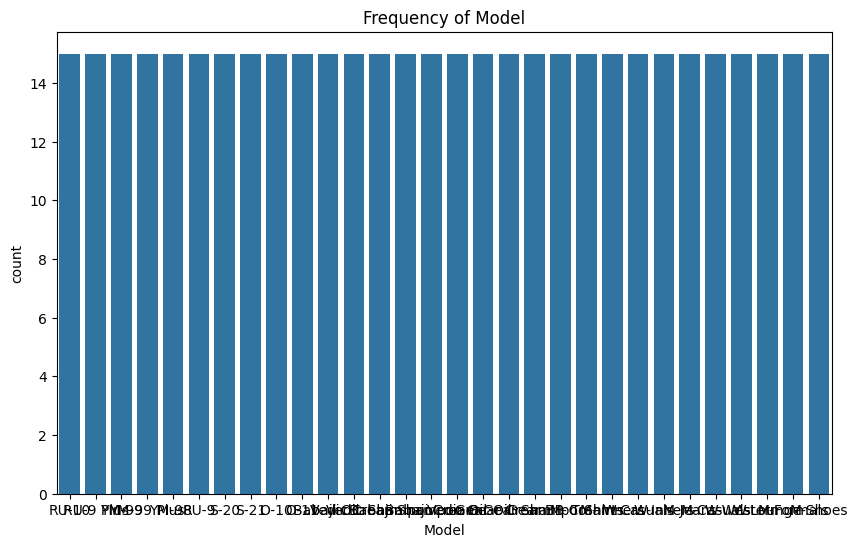

In [12]:
categorical_columns = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# Loop through the categorical columns and create bar charts
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.show()

Jeera Brand has the most Sales

# Standardization

Standardization is a technique to rescale features to have a mean of 0 and a standard deviation of 1. 

This helps:

Equalize Feature Importance: Features with different scales contribute equally.

Improve Model Performance: Many models assume normally distributed data.

Enable Comparison: Features can be compared directly.

Formula:z=x-mu/sigma

In [13]:
# for this formula we already have a pre defined function

from scipy import stats
from sklearn.preprocessing import StandardScaler

In [14]:
scaling = StandardScaler()
scaled = scaling.fit_transform(df[['Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']])
scaled_df = pd.DataFrame(scaled, columns=['Avg Price scaled', 'Total Sales Value scaled', 'Discount Rate (%) scaled', 'Discount Amount scaled', 'Net Sales Value scaled'])
scaled_df

,Avg Price scaled,Total Sales Value scaled,Discount Rate (%) scaled,Discount Amount scaled,Net Sales Value scaled
0,0.091173,2.925721,-0.830289,3.952816,2.804756
1,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...
445,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [15]:
compare_df = pd.concat([df, scaled_df], axis=1)
compare_df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Avg Price scaled,Total Sales Value scaled,Discount Rate (%) scaled,Discount Amount scaled,Net Sales Value scaled
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


# One hot Encoding - Dummy Variables

Need - In ay machine learning model to perform calculations the algorithm needs numbers and since categorical columns have dtype= object they cannot be used for such operations.
- Solution - We need to convert categorical columns to numerical columns. This can be done using the get

In [26]:
df['Brand'].unique()

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [ ]:
#creating dummy 

df_brand = df['Brand']
df_brand_encoded = pd.get_dummies(df_brand, columns=[df_brand])
df_brand_encoded

,Babaji,Gear,Jeera,Orange,RealU,Sumsang,Vedic,Viva,YouM
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
445,0,0,1,0,0,0,0,0,0
446,0,0,0,0,0,0,0,1,0
447,0,0,0,0,0,0,0,1,0
448,0,0,1,0,0,0,0,0,0


In [23]:
df['Model'].unique()

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

In [36]:
df_model = df['Model']
df_model_encoded = pd.get_dummies(df_model, columns= df_model )
df_model_encoded

,Babaji Cream,Babaji Oil,Babaji Shampoo,Gear BB Cream,Gear Cream,Gear Oil,Gear Shampoo,M- Inners,M- T Shirts,M-Casuals,...,Vedic Cream,Vedic Oil,Vedic Shampoo,W-Casuals,W-Inners,W-Lounge,W-Western,YM-98,YM-99,YM-99 Plus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df['Day'].unique()
df_day = df['Day']
df_day_encoded = pd.get_dummies(df_day, columns=df_day)
df_day_encoded

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
445,0,0,0,0,1,0,0
446,0,0,0,0,1,0,0
447,0,0,0,0,1,0,0
448,0,0,0,0,1,0,0


# Conclusion